## Testing the relative sizes of male and female penguins of a given species

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


We use a simplified version of the penguins dataset from [kaggle](https://www.kaggle.com/datasets/way2studytable/palmer-penguins-using-r).
We drop the rows with missing data. 

In [2]:
penguins = pd.read_csv('data/penguins_size.csv').dropna()
valid  = penguins['sex'].apply(lambda x: x in ['MALE','FEMALE'])
penguins = penguins[valid]

<Axes: xlabel='species', ylabel='body_mass_g'>

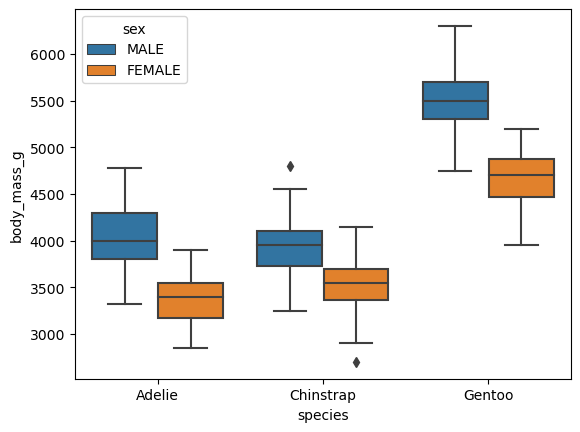

In [3]:
sns.boxplot(data=penguins, x='species', y='body_mass_g',hue="sex")

In [4]:
Adelie = penguins[penguins['species']=='Adelie']

In [10]:
summary = Adelie.groupby('sex')['body_mass_g'].describe()
print(summary)
nFemale = summary.loc['FEMALE','count']
# the errors here are related to how numpy types are defined and aren't real
FemaleMean = summary.loc['FEMALE','mean']
MaleMean =  summary.loc['MALE','mean']
print(type(FemaleMean))
diff = FemaleMean - MaleMean


        count         mean         std     min     25%     50%     75%     max
sex                                                                           
FEMALE   73.0  3368.835616  269.380102  2850.0  3175.0  3400.0  3550.0  3900.0
MALE     73.0  4043.493151  346.811553  3325.0  3800.0  4000.0  4300.0  4775.0
<class 'float'>
-674.6575342465753


In [ ]:
shuffled_diffs=[]
for i in range(1000):
    shuffled = Adelie.sample(frac=1)
    shuffled_mean = shuffled.loc[:nFemale,'body_mass_g'].mean() - shuffled.loc[nFemale:,'body_mass_g'].mean()
    shuffled_diffs.append(shuffled_mean)
print(np.mean([diff < x for x in shuffled_diffs]))

In [ ]:
sns.histplot(shuffled_diffs).set(title='Resampling of differences in mean weights\n for male and female Adelie penguins')

In [ ]:
means=Adelie.groupby('sex')['body_mass_g'].mean()

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
Adelie[Adelie['sex']=='MALE']['body_mass_g']

In [ ]:
ttest_ind(Adelie[Adelie['sex']=='FEMALE']['body_mass_g'],Adelie[Adelie['sex']=='MALE']['body_mass_g'])

In [ ]:
grouped = penguins.groupby(['species','sex'],as_index=False)['body_mass_g'].agg(['mean','count'])


In [ ]:
grouped['key'] = grouped['species']+'-'+grouped['sex']

In [ ]:
grouped

In [ ]:
penguins['key']=penguins['species']+'-'+penguins['sex']

In [ ]:
obs_var = penguins.groupby('key')['body_mass_g'].mean().var()

In [ ]:
vars=[]
for i in range(100):
    shuffled = penguins.copy()
    shuffled['body_mass_g'] = (shuffled['body_mass_g']).sample(frac=1,ignore_index=True)
    vars.append(shuffled.groupby('key')['body_mass_g'].mean().var())
np.mean([obs_var < x for x in vars])